In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
#import graphviz # conda install -c anaconda graphviz
import pydotplus

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_predict

In [2]:
conda install -c anaconda graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py39haa95532_0         155 KB  anaconda
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    graphviz-2.38              |       hfd603c8_2        37.7 MB  anaconda
    ------------------------------------------------------------
                                           Total:        38.9 MB

The following NEW packages will be INSTALLED:

  graphviz           anaconda/win-64::graphviz-2.38-hfd603c8_2

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> anaconda
  conda              conda-forge::conda-4.13.0-py39hcbf530~ --> anaconda::conda-4.13.0-py3



==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3





graphviz-2.38        | 37.7 MB   | ###7       |  37% 
graphviz-2.38        | 37.7 MB   | ###9       |  39% 
graphviz-2.38        | 37.7 MB   | ####       |  41% 
graphviz-2.38        | 37.7 MB   | ####2      |  43% 
graphviz-2.38        | 37.7 MB   | ####4      |  45% 
graphviz-2.38        | 37.7 MB   | ####6      |  46% 
graphviz-2.38        | 37.7 MB   | ####8      |  48% 
graphviz-2.38        | 37.7 MB   | ####9      |  50% 
graphviz-2.38        | 37.7 MB   | #####1     |  52% 
graphviz-2.38        | 37.7 MB   | #####3     |  53% 
graphviz-2.38        | 37.7 MB   | #####5     |  55% 
graphviz-2.38        | 37.7 MB   | #####6     |  57% 
graphviz-2.38        | 37.7 MB   | #####8     |  59% 
graphviz-2.38        | 37.7 MB   | ######     |  61% 
graphviz-2.38        | 37.7 MB   | ######2    |  63% 
graphviz-2.38        | 37.7 MB   | ######4    |  65% 
graphviz-2.38        | 37.7 MB   | ######6    |  67% 
graphviz-2.38        | 37.7 MB   | ######8    |  69% 
graphviz-2.38        | 37.7

In [4]:
df_test = pd.read_csv("bc_test_data_10.csv")
df_test.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,901288,M,20.64,17.35,134.80,1335.0,0.09446,0.1076,0.1527,0.08941,...,25.37,23.17,166.8,1946.0,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055
1,8860702,M,17.30,17.08,113.00,928.2,0.10080,0.1041,0.1266,0.08353,...,19.85,25.09,130.9,1222.0,0.1416,0.2405,0.3378,0.1857,0.3138,0.08113
2,877500,M,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,0.05980,...,18.33,30.12,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130


In [5]:
df = pd.read_csv("bc_data_90.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
print(df.shape)

print(df.diagnosis.value_counts())

(512, 32)
B    319
M    193
Name: diagnosis, dtype: int64


In [9]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

x = df[features]
y = df['diagnosis']

###### https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431 
###### https://www.datacamp.com/tutorial/decision-tree-classification-python

# Building the first decision tree classifier

#### The data is split according to the cross-validation parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set

In [11]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [12]:
# # Label Encode the target variable
# label_encoder = LabelEncoder()
# encoded_y = label_encoder.fit_transform(y)
# label_encoder_name_mapping = dict(zip(label_encoder.classes_,
#                                          label_encoder.transform(label_encoder.classes_)))
# print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
# # print("Label Encoded Target Variable", encoded_y, sep="\n")

In [13]:
model1 = DecisionTreeClassifier(criterion="entropy")

In [16]:
model2= RandomForestClassifier(criterion='entropy')

In [14]:
y_pred1 = cross_val_predict(model1, x, y, cv=cv)

In [17]:
y_pred2 = cross_val_predict(model2, x, y, cv=cv)

302 17 20 173


,accuracy,type 2 error,recall
0,0.927734,0.103627,0.896373


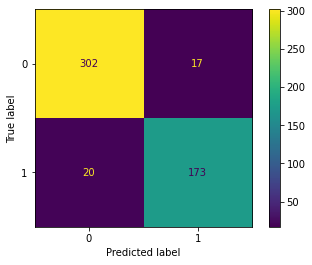

In [15]:
cm1 = confusion_matrix(y, y_pred1)
tn1, fp1, fn1, tp1 = cm1.ravel()
print(tn1, fp1, fn1, tp1)
ConfusionMatrixDisplay(cm1).plot()

# accuracy
acc1 = (tp1+tn1)/(tn1+fp1+fn1+tp1)
# type II error
error1 = fn1/(fn1+tp1)
# Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
#Recall is a useful metric in cases where False Negative trumps False Positive.
#Recall is important in medical cases where it doesn’t matter whether we raise a false alarm
#but the actual positive cases should not go undetected!
#In our example, Recall would be a better metric because we don’t want to accidentally discharge an infected
#person and let them mix with the healthy population thereby spreading the contagious virus. 
recall1 = tp1/(tp1+fn1)

df1 = pd.DataFrame({'accuracy':[acc1],'type 2 error': [error1],'recall':[recall1]})
df1

In [19]:
cm2 = confusion_matrix(y, y_pred2)
cm2

array([[310,   9],
       [ 15, 178]], dtype=int64)

Text(0.5, 15.0, 'Predicted Values')

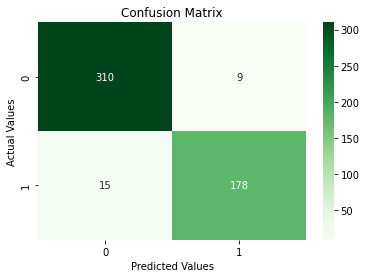

In [23]:
#plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm2, annot=True,fmt='d', cmap='Greens')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Resampling using undersampling technique to balance the class distribution

##### https://medium.com/@160shelf/decision-tree-on-imbalanced-dataset-f1575414a6c2
##### https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
##### Undersampling — Deleting samples from the majority class. This method seeks to randomly select and remove samples from the majority class, consequently reducing the number of examples in the majority class in the transformed data. The result of undersampling is a transformed data set with less examples in the majority class — this process may be repeated until the number of examples in each class is equal.
##### https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf
##### !!! https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/ !!!
##### Through an undersampling technique, we can remove certain events from the majority class, which is made up of the benign diagnoses. The goal is to create a balanced dataset that reflects the real world and can most accurately detect malignant cases. 

In [6]:
# example of random undersampling to balance the class distribution

# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
x_over, y_over = undersample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))

Counter({'B': 319, 'M': 193})
Counter({'B': 193, 'M': 193})


## class distribution is balanced

##### This undersampling transform can also be used in a Pipeline, like the oversampling transform from the previous section. This allows the transform to be applied to the training dataset only using evaluation schemes such as k-fold cross-validation, avoiding any data leakage in the evaluation of a model.

In [12]:
steps1 = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier(criterion="entropy"))]

In [13]:
pipeline1 = Pipeline(steps=steps1)

In [14]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [15]:
y_pred2 = cross_val_predict(pipeline1, x_over, y_over, cv=cv)

176 17 19 174


,accuracy,type 2 error,recall
0,0.906736,0.098446,0.901554


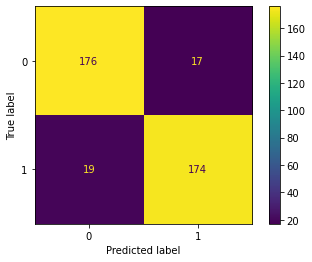

In [16]:
cm2 = confusion_matrix(y_over, y_pred2)
tn2, fp2, fn2, tp2 = cm2.ravel()
print(tn2, fp2, fn2, tp2)
ConfusionMatrixDisplay(cm2).plot()

# accuracy
acc2 = (tp2+tn2)/(tn2+fp2+fn2+tp2)
# type II error
error2 = fn2/(fn2+tp2)
# Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
#Recall is a useful metric in cases where False Negative trumps False Positive.
#Recall is important in medical cases where it doesn’t matter whether we raise a false alarm
#but the actual positive cases should not go undetected!
#In our example, Recall would be a better metric because we don’t want to accidentally discharge an infected
#person and let them mix with the healthy population thereby spreading the contagious virus. 
recall2 = tp2/(tp2+fn2)

df2 = pd.DataFrame({'accuracy':[acc2],'type 2 error': [error2],'recall':[recall2]})
df2

# 

# Hyper-Parameter Tuning 

In [17]:
params = {'max_depth':  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'max_features': [None, 'sqrt', 'log2', 2, 4, 6, 8, 10, 12],
#     'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']}

In [18]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [19]:
clf = GridSearchCV(DecisionTreeClassifier(),
    param_grid=params,
    cv=cv)

In [20]:
clf.fit(x_over, y_over) #fit to the model
best_params = list(clf.best_params_.values())
best_params[0],best_params[1],best_params[2]

(10, 10, 'random')

In [21]:
clf.best_params_

{'max_depth': 10, 'max_features': 10, 'splitter': 'random'}

In [20]:
model2_5 = DecisionTreeClassifier(criterion="entropy", 
                        max_depth=best_params[0], max_features=best_params[1], splitter=best_params[2])

In [33]:
output = cross_validate(model2_5, x_over, y_over, cv=cv, scoring = 'accuracy', return_estimator =True)

In [34]:
output

{'fit_time': array([0.00598979, 0.00298381, 0.00225925, 0.00174212, 0.00173998,
        0.00188899, 0.00193501, 0.00196314, 0.00190425, 0.00186706]),
 'score_time': array([0.00243831, 0.00187612, 0.00110078, 0.00100803, 0.00121403,
        0.00134087, 0.00133896, 0.00113797, 0.00115895, 0.00097775]),
 'estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                         splitter='random'),
  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                         splitter='random'),
  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                         splitter='random'),
  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                         splitter='random'),
  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                         splitter='random'),
  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10

In [35]:
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = features,
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                         importance
radius_mean                0.365445
area_worst                 0.150665
perimeter_se               0.073812
concavity_mean             0.052715
concavity_worst            0.048410
compactness_mean           0.037461
area_mean                  0.037280
area_se                    0.036250
perimeter_worst            0.033689
texture_mean               0.029836
symmetry_worst             0.029165
concave points_mean        0.025148
smoothness_se              0.023984
texture_worst              0.014304
symmetry_mean              0.014139
radius_worst               0.008352
smoothness_worst           0.007851
concavity_se               0.005893
texture_se                 0.005599
concave points_worst       0.000000
compactness_worst          0.000000
compactness_se             0.000000
fractal_dimension_se       0.000000
symmetry_se                0.000000
concave points_se          0.000000
radius_se       

In [36]:
feature_importances

,importance
concave points_worst,0.360197
radius_worst,0.217834
area_worst,0.075037
area_mean,0.052989
concave points_mean,0.037637
perimeter_mean,0.036433
compactness_worst,0.032876
concavity_worst,0.030634
smoothness_mean,0.022001
smoothness_worst,0.021152


# Apply these parameters to the model

In [22]:
steps2 = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier(criterion="entropy", 
                        max_depth=best_params[0], max_features=best_params[1], splitter=best_params[2]))]

In [23]:
pipeline2 = Pipeline(steps=steps2)

In [24]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [25]:
y_pred3 = cross_val_predict(pipeline2, x_over, y_over, cv=cv)

174 19 17 176


,accuracy,type 2 error,recall
0,0.906736,0.088083,0.911917


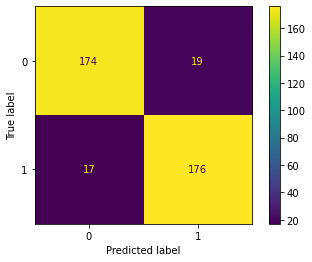

In [26]:
cm3 = confusion_matrix(y_over, y_pred3)
tn3, fp3, fn3, tp3 = cm3.ravel()
print(tn3, fp3, fn3, tp3)
ConfusionMatrixDisplay(cm3).plot()

# accuracy
acc3 = (tp3+tn3)/(tn3+fp3+fn3+tp3)
# type II error
error3 = fn3/(fn3+tp3)
# Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
#Recall is a useful metric in cases where False Negative trumps False Positive.
#Recall is important in medical cases where it doesn’t matter whether we raise a false alarm
#but the actual positive cases should not go undetected!
#In our example, Recall would be a better metric because we don’t want to accidentally discharge an infected
#person and let them mix with the healthy population thereby spreading the contagious virus. 
recall3 = tp3/(tp3+fn3)

df3 = pd.DataFrame({'accuracy':[acc3],'type 2 error': [error3],'recall':[recall3]})
df3

##### the other 10% of the original data

In [27]:
x2 = df_test[features]
y2 = df_test['diagnosis']

In [28]:
model2 = DecisionTreeClassifier(criterion="entropy", 
                        max_depth=best_params[0], max_features=best_params[1], splitter=best_params[2])

In [29]:
y_pred4 = cross_val_predict(model2, x2, y2, cv=cv)

36 2 1 18


,accuracy,type 2 error,recall
0,0.947368,0.052632,0.947368


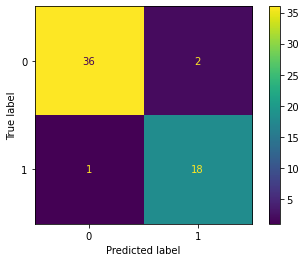

In [30]:
cm4 = confusion_matrix(y2, y_pred4)
tn4, fp4, fn4, tp4 = cm4.ravel()
print(tn4, fp4, fn4, tp4)
ConfusionMatrixDisplay(cm4).plot()

# accuracy
acc4 = (tp4+tn4)/(tn4+fp4+fn4+tp4)
# type II error
error4 = fn4/(fn4+tp4)
# Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
#Recall is a useful metric in cases where False Negative trumps False Positive.
#Recall is important in medical cases where it doesn’t matter whether we raise a false alarm
#but the actual positive cases should not go undetected!
#In our example, Recall would be a better metric because we don’t want to accidentally discharge an infected
#person and let them mix with the healthy population thereby spreading the contagious virus. 
recall4 = tp4/(tp4+fn4)

df4 = pd.DataFrame({'accuracy':[acc4],'type 2 error': [error4],'recall':[recall4]})
df4